Notebook to explore python visualisation libraries

### Setup

In [2]:
from sklearn.datasets import fetch_california_housing

In [5]:
import pandas as pd

In [3]:
import warnings, logging

In [4]:
warnings.simplefilter("ignore")

In [5]:
logging.getLogger('matplotlib.font_manager').disabled = True

In [6]:
# Getting example dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [7]:
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [8]:
X.columns.to_list()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## Yellowbrick

- Docs: https://www.scikit-yb.org/en/latest/index.html

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)

In [12]:
feature_cols = [
    'MedInc',
     'HouseAge',
     'AveRooms',
     'AveBedrms',
     'Population',
     'AveOccup',
]    

In [13]:
pipeline.fit(X_train[feature_cols], y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [14]:
r2_score(y_test, pipeline.predict(X_test[feature_cols]))

0.5119755667840205

#### Residual plot

In [15]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

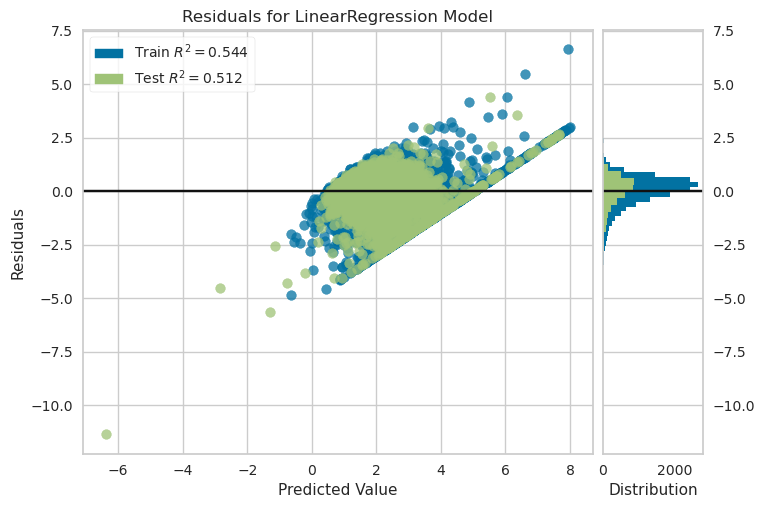

In [16]:
visualizer = ResidualsPlot(pipeline)
visualizer.fit(X_train[feature_cols], y_train)
visualizer.score(X_test[feature_cols], y_test)
visualizer.show();

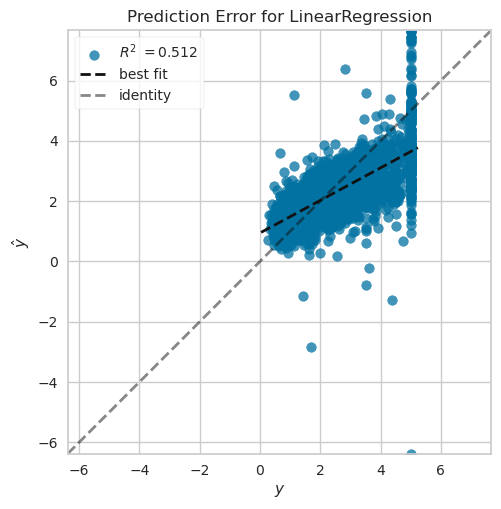

In [17]:
visualizer = PredictionError(pipeline)

visualizer.fit(X_train[feature_cols], y_train)  # Fit the training data to the visualizer
visualizer.score(X_test[feature_cols], y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

Editing plots with MPL object-orientated interface

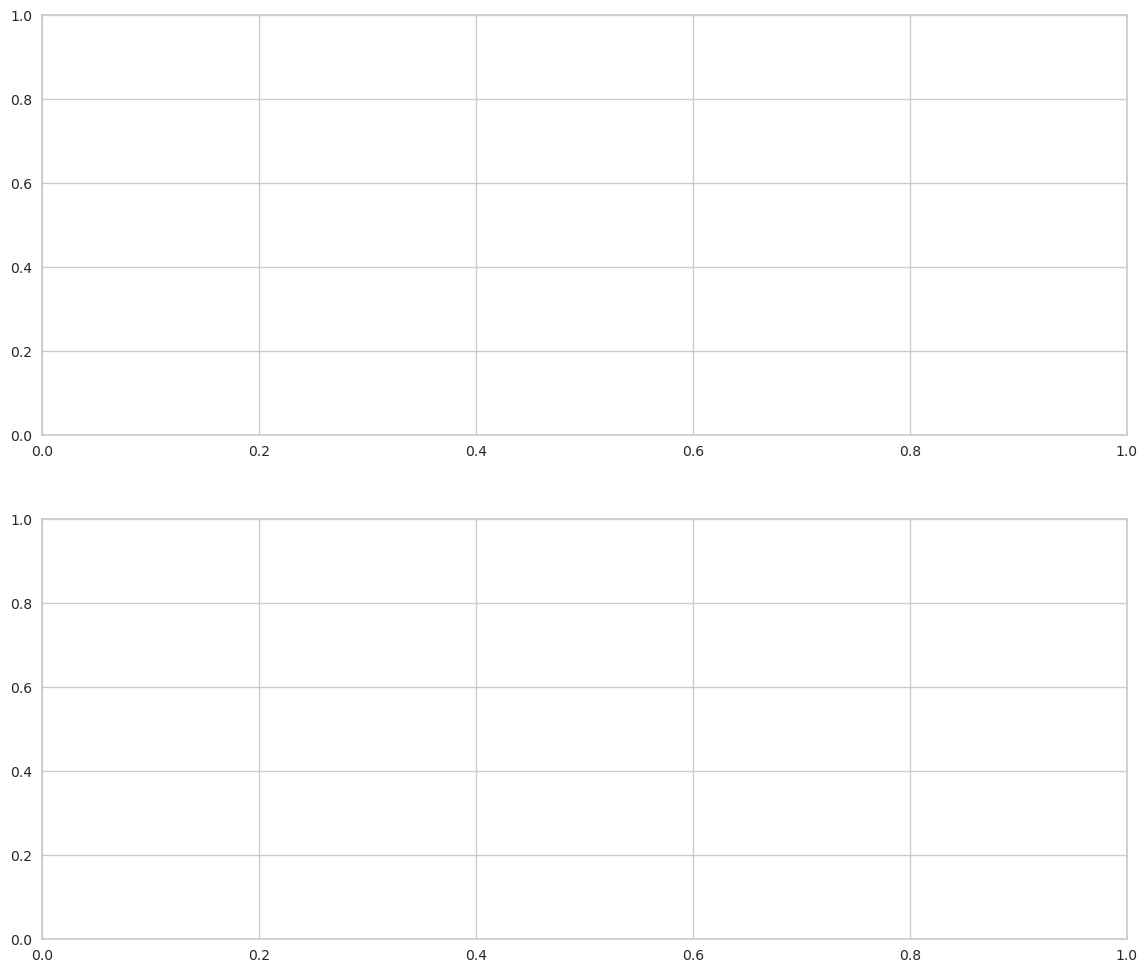

In [18]:
fig, axs = plt.subplots(2, 1, figsize = (14, 12));

In [19]:
from yellowbrick.regressor.prediction_error import prediction_error
from yellowbrick.regressor import residuals_plot

In [20]:
# quick draw method
visualiser_errors = prediction_error(
    pipeline,
    X_train[feature_cols],
    y_train,
    X_test[feature_cols],
    y_test,
    show=False,
    shared_limits=False,
    ax=axs[0],
)

In [21]:
# quick draw method
visualiser_residuals = residuals_plot(
    pipeline,
    X_train[feature_cols],
    y_train,
    X_test[feature_cols],
    y_test,
    hist=False,
    qqplot=True,
    show=False,
    ax=axs[1],
)

In [22]:
visualiser_errors.ax.set_xlim([0, 6])
visualiser_errors.ax.set_ylim([0, 8])
visualiser_errors.ax.legend(loc=2)

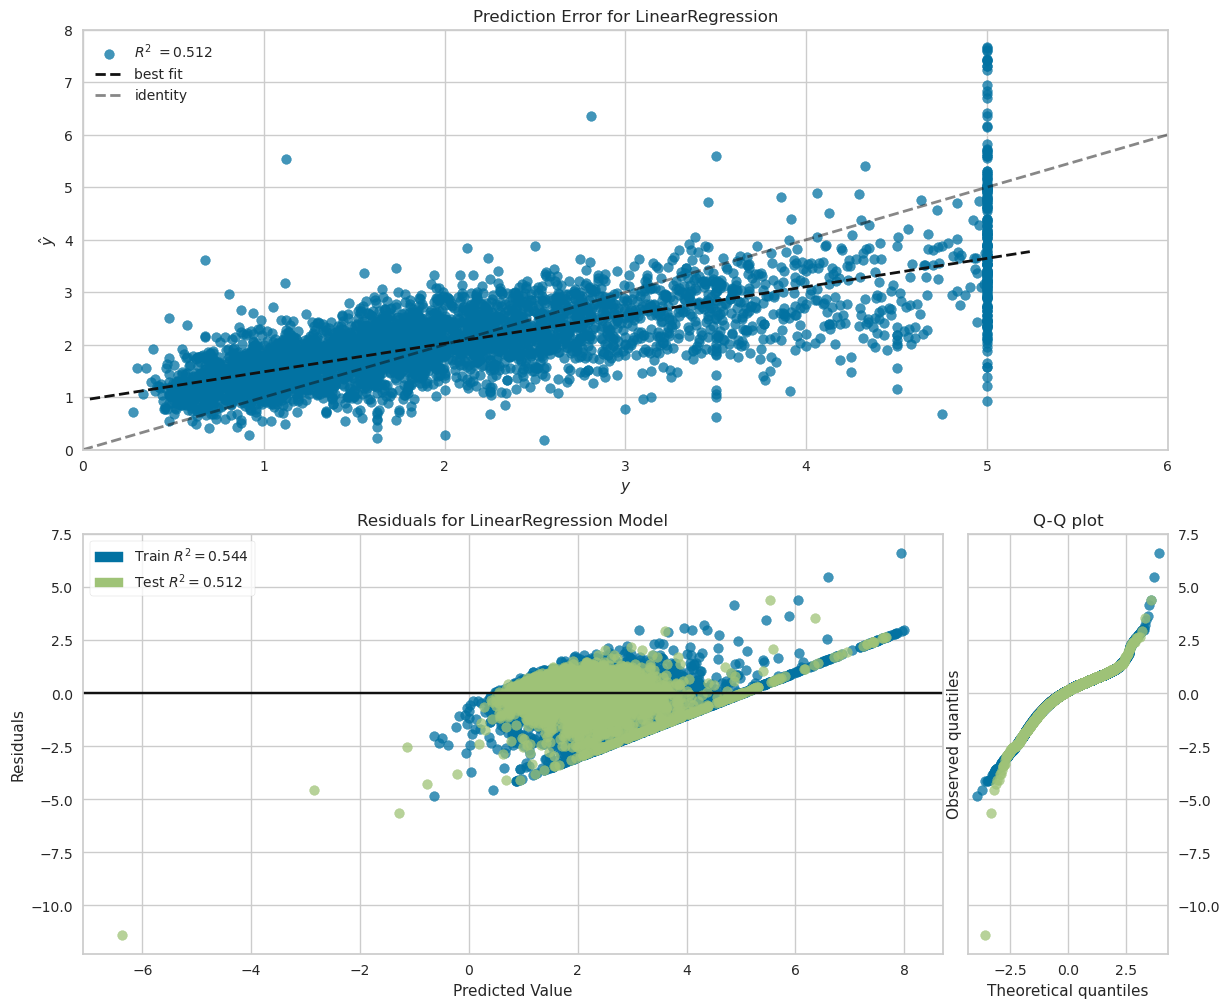

In [23]:
fig

## mlxtend

- Docs: https://rasbt.github.io/mlxtend/

Package isn't completely compatible with recent sklearn changes like the use of pandas dataframes.

In [13]:
import pandas as pd

In [14]:
penguin_filepath = "../data/penguins_size.csv"

In [15]:
df_penguins = pd.read_csv(penguin_filepath)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [119]:
from mlxtend.plotting import plot_decision_regions

In [120]:
import numpy as np

In [171]:
from sklearn.metrics import accuracy_score

In [109]:
penguin_feature_cols = [
    'culmen_length_mm', 'culmen_depth_mm',
       # 'flipper_length_mm', 'body_mass_g',
]

In [142]:
X = df_penguins[penguin_feature_cols]
y = df_penguins['species'].map(label_mapping)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [152]:
simple_inputer = SimpleImputer()
X_train = simple_inputer.fit_transform(X_train)
X_test = simple_inputer.transform(X_test)

In [155]:
lr_model = LogisticRegression().fit(X_train, y_train)
svc_model = SVC().fit(X_train, y_train)
adab_model = AdaBoostClassifier().fit(X_train, y_train)

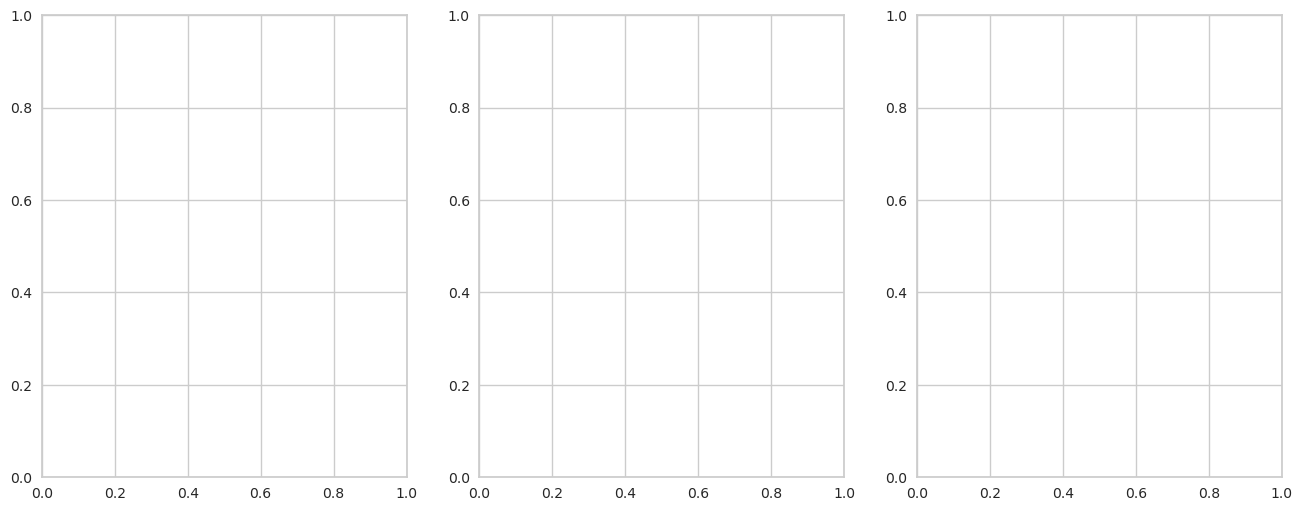

In [170]:
# plotting
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

In [174]:
clf_names = ["Logistic regression", "SVC", "AdaBoost"]
clfs = [lr_model, svc_model, adab_model]

xlabel, ylabel = penguin_feature_cols
for clf, clf_name, ax in zip(clfs, clf_names, axs):
    plot_decision_regions(
        X_test,
        y_test.to_numpy(),
        clf=clf,
        ax=ax
    )
    
    acc = accuracy_score(y_test, clf.predict(X_test))
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"clf_name: accuracy: {100.0 * acc:.2f}%")

<Figure size 800x550 with 0 Axes>

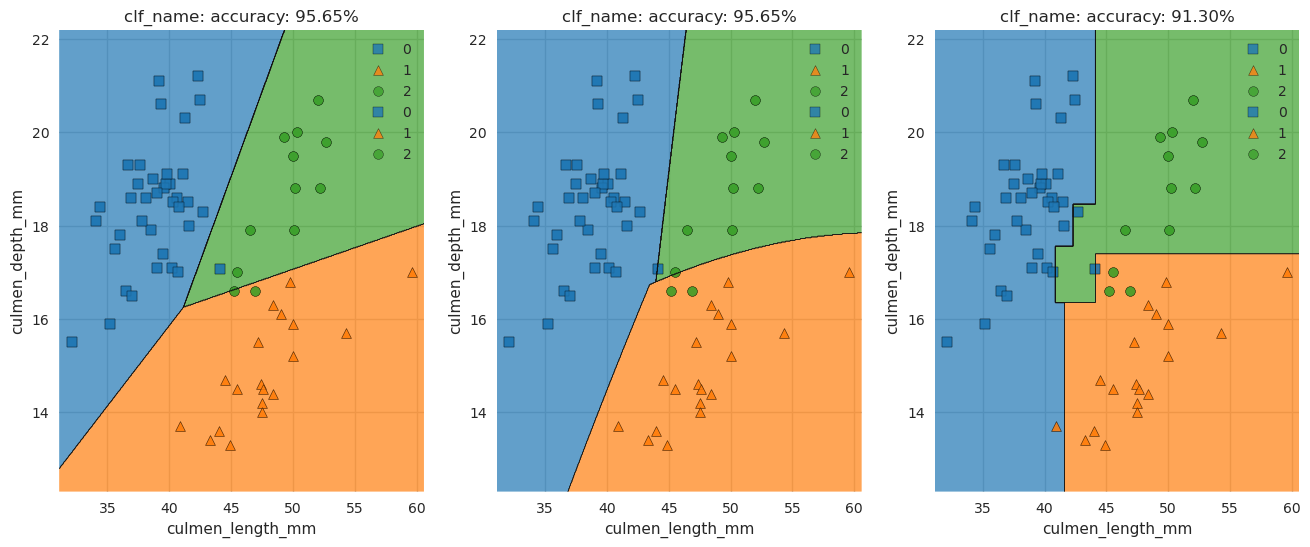

In [175]:
fig

## mplfinance

Docs: 
- https://github.com/matplotlib/mplfinance/t 
- https://pypi.org/project/mplfinance/

In [48]:
import mplfinance as mpf
import matplotlib.pyplot as plt

In [39]:
df_AAPL = pd.read_csv("../data/AAPL.csv.zip")

In [40]:
df_AAPL.set_index("Date", inplace=True)

In [41]:
df_AAPL.index = pd.to_datetime(df_AAPL.index)

In [44]:
df_AAPL = df_AAPL[(df_AAPL.index > '2004-02-01') & (df_AAPL.index < '2004-05-01')]

In [63]:
mpf_styles = [
    'yahoo',
    'mike',
    'binance',
]

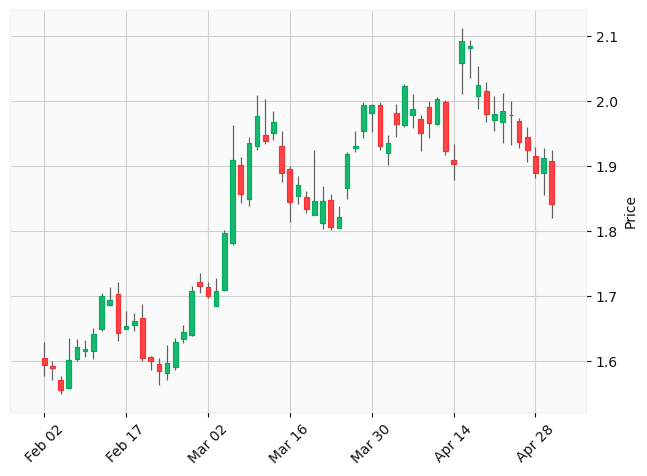

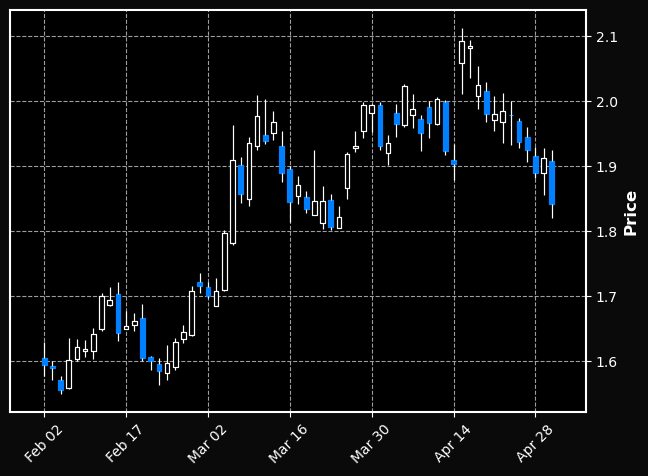

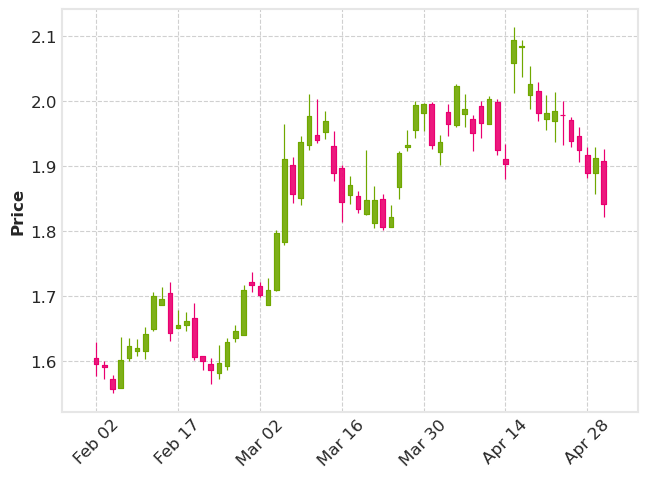

In [66]:
for mpf_style in mpf_styles:
    mpf.plot(df_AAPL, type='candle', style=mpf_style)

In [67]:
# showing make_addplot functionality

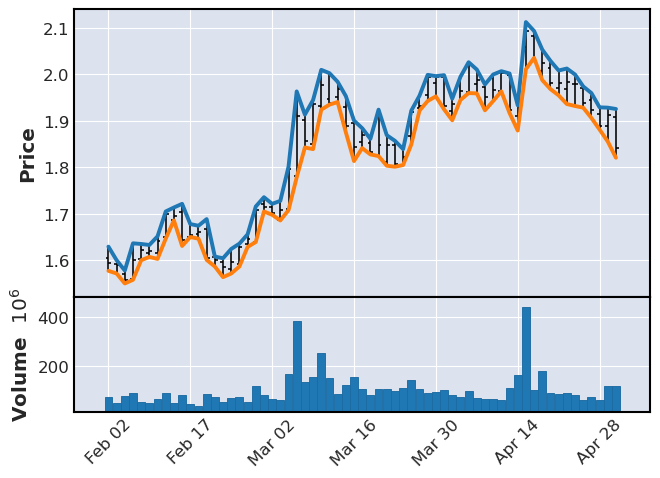

In [69]:
add_plots = mpf.make_addplot(df_AAPL[["High", "Low"]])
mpf.plot(df_AAPL, addplot=add_plots, volume=True)

In [70]:
df_AAPL["range"] = df_AAPL["High"] - df_AAPL["Low"]

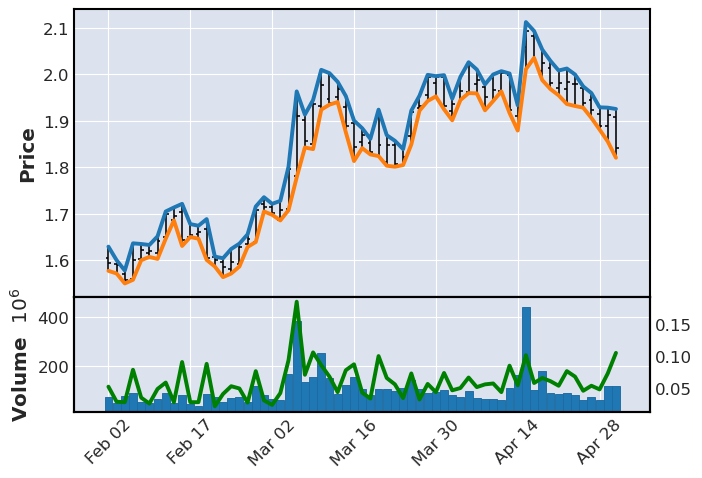

In [73]:
add_plots = [
    mpf.make_addplot(df_AAPL[["High", "Low"]]),
    mpf.make_addplot(df_AAPL["range"], panel=1, color='g'),
]
mpf.plot(df_AAPL, addplot=add_plots, volume=True)

Notes:
- Makes alright plots
- API a bit strange
- Difficult to get access to underlying objects
- Good range of styles
- Has potential

## mpld3

In [3]:
import matplotlib.pyplot as plt
import mpld3
import numpy as np

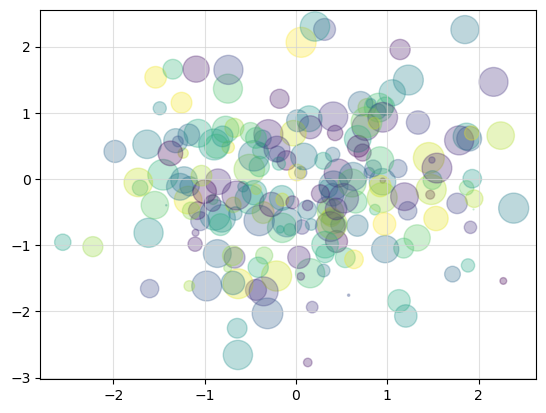

In [4]:
# Scatter points
fig, ax = plt.subplots()
np.random.seed(0)
x, y = np.random.normal(size=(2, 200))
color, size = np.random.random((2, 200))

ax.scatter(x, y, c=color, s=500 * size, alpha=0.3)
ax.grid(color='lightgray', alpha=0.7)

In [5]:
mpld3.display(fig)

In [7]:
mpld3.enable_notebook()

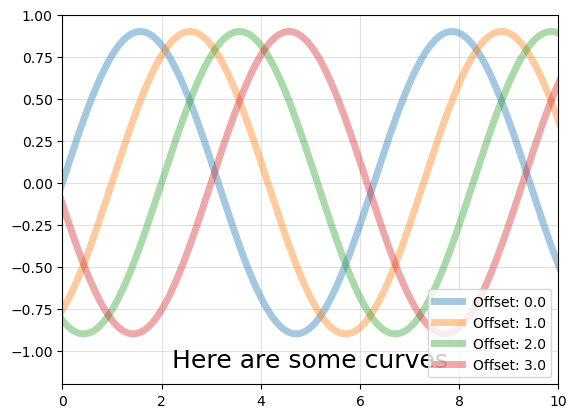

In [8]:
# Draw lines
fig, ax = plt.subplots()
x = np.linspace(-5, 15, 1000)
for offset in np.linspace(0, 3, 4):
    ax.plot(x, 0.9 * np.sin(x - offset), lw=5, alpha=0.4,
            label="Offset: {0}".format(offset))
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.0)
ax.text(5, -1.1, "Here are some curves", size=18, ha='center')
ax.grid(color='lightgray', alpha=0.7)
ax.legend()

In [9]:
mpld3.display(fig)

species
Adelie       Axes(0.125,0.11;0.775x0.77)
Chinstrap    Axes(0.125,0.11;0.775x0.77)
Gentoo       Axes(0.125,0.11;0.775x0.77)
Name: culmen_length_mm, dtype: object

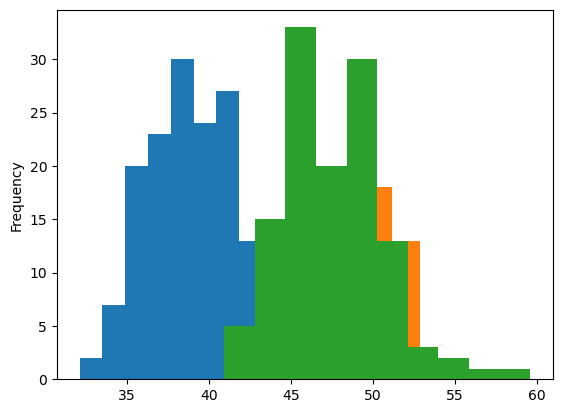

In [17]:
df_penguins.groupby(by="species")["culmen_length_mm"].plot.hist()

In [18]:
from mpld3 import plugins

In [28]:
# interactive legend
fig, ax = plt.subplots()
df_penguins.groupby(by="species")["culmen_length_mm"].plot.hist(ax=ax)
ax.legend()

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     # ax=ax,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

ax.set_title('Interactive legend', size=20)
mpld3.display(fig)
# mpld3.show()

In [26]:
mpld3.display(fig)

In [29]:
# generate df
N = 100
df = pd.DataFrame((.1 * (np.random.random((N, 5)) - .5)).cumsum(0),
                  columns=['a', 'b', 'c', 'd', 'e'],)

# plot line + confidence interval
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

for key, val in df.items():
    l, = ax.plot(val.index, val.values, label=key)
    ax.fill_between(val.index,
                    val.values * .5, val.values * 1.5,
                    color=l.get_color(), alpha=.4)

# define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)
plugins.connect(fig, interactive_legend)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interactive legend', size=20)

mpld3.display(fig)

## great_tables

## Datashader